 #  A Whale off the Port(folio)


In [61]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib as plt
import seaborn as sns
import warnings


In [62]:
# get rid of warnings
warnings.filterwarnings("ignore")

# Data Cleaning



## Whale Returns



In [63]:
# Reading whale returns
whalefile = Path('../code_and_stocks/Resources/whale_returns.csv')
whale_df = pd.read_csv(whalefile, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [64]:
# Counting the nulls 
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [65]:
# Droping the nulls with dropna
whale_df = whale_df.dropna()
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [66]:
# preview the dataframe
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [67]:
# preview the data types in the data frame
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


## Algorithmic Daily Returns



In [68]:
# Reading algorithmic returns
algofile = Path('../code_and_stocks/Resources/algo_returns.csv')
algo_df = pd.read_csv(algofile, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [69]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [70]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [71]:
# preview the dataframe
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [72]:
# preview the data types
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


## S&P 500 Returns



In [73]:
# Reading S&P 500 Closing Prices
spfile = Path('../code_and_stocks/Resources/sp500_history.csv')
sp_df = pd.read_csv(spfile, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [74]:
# preview the data types 
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [75]:
# preview the data frame
sp_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [76]:
# get rid of the $ in the data frame
sp_df['Close'] = sp_df['Close'].str.replace('$', '')
sp_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [77]:
# convert the values to floats and confirm the change
sp_df['Close'] = sp_df['Close'].astype(float)
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [78]:
# convert the values to daily returns
sp_df['SP500'] = sp_df['Close'].pct_change()
sp_df = sp_df.drop(columns=['Close'])
sp_df.head()

,SP500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [79]:
# drop the nulls and confirm they are dropped
sp_df = sp_df.dropna()
sp_df.isna().sum()

SP500    0
dtype: int64

In [80]:
# change the dataframe to ascending order
sp_df.sort_index(inplace=True)
sp_df.head()

,SP500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [81]:
# combine all the portfolios and preview the new dataframe
combined_df = pd.concat([whale_df, algo_df, sp_df], axis=1, join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis



## Performance Anlysis



<Axes: xlabel='Date'>

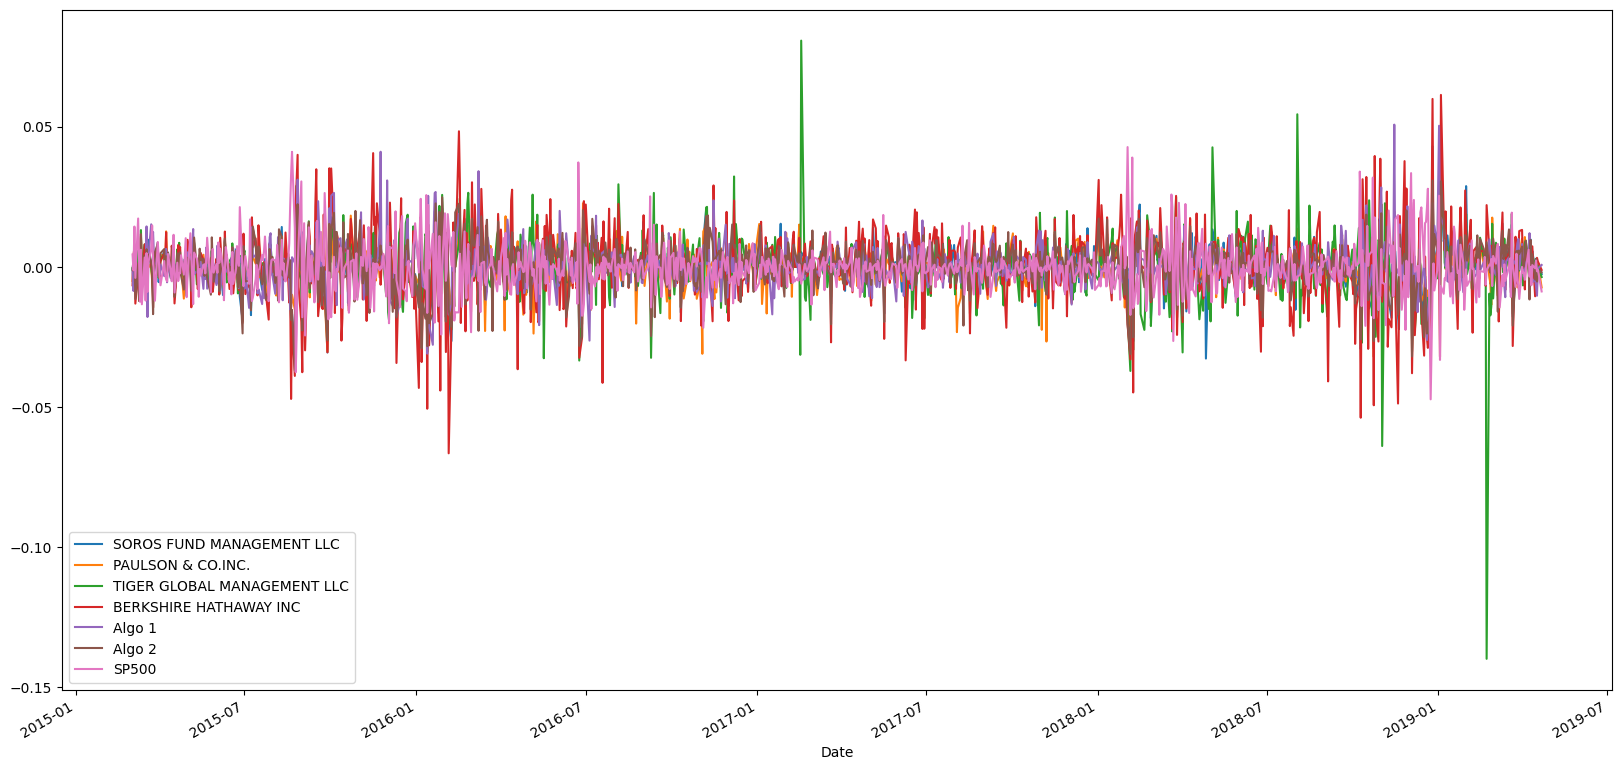

In [82]:
# showing the daily returns of each portfolio on a plot
combined_df.plot(figsize=(20,10))

<Axes: xlabel='Date'>

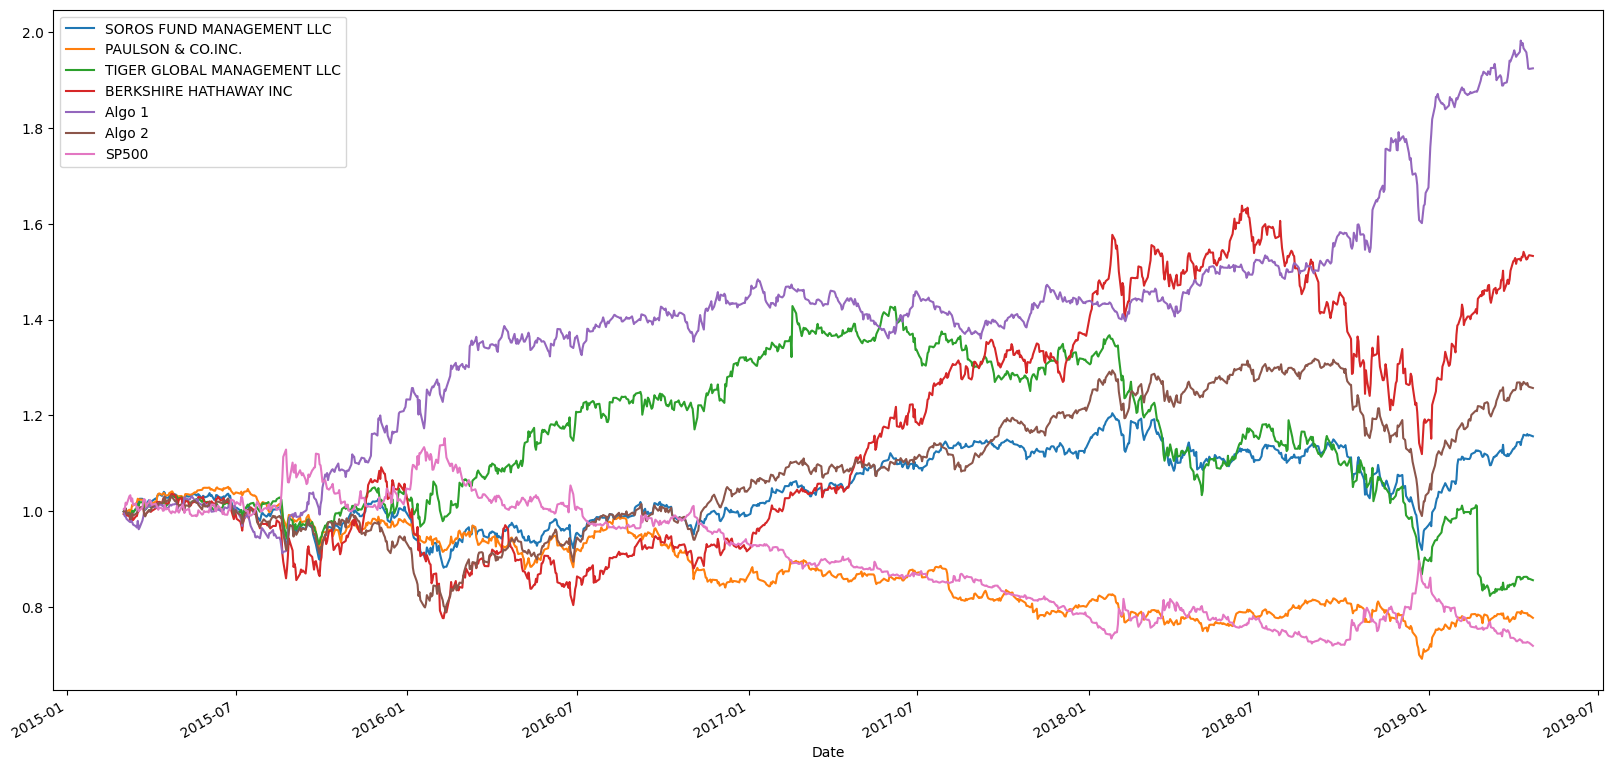

In [83]:
# calculate cumulative returns of all portfolios and plot the returns
cumulative_combined_returns = (1 + combined_df).cumprod()
cumulative_combined_returns.plot(figsize=(20,10))

---

## Risk Analysis


<Axes: >

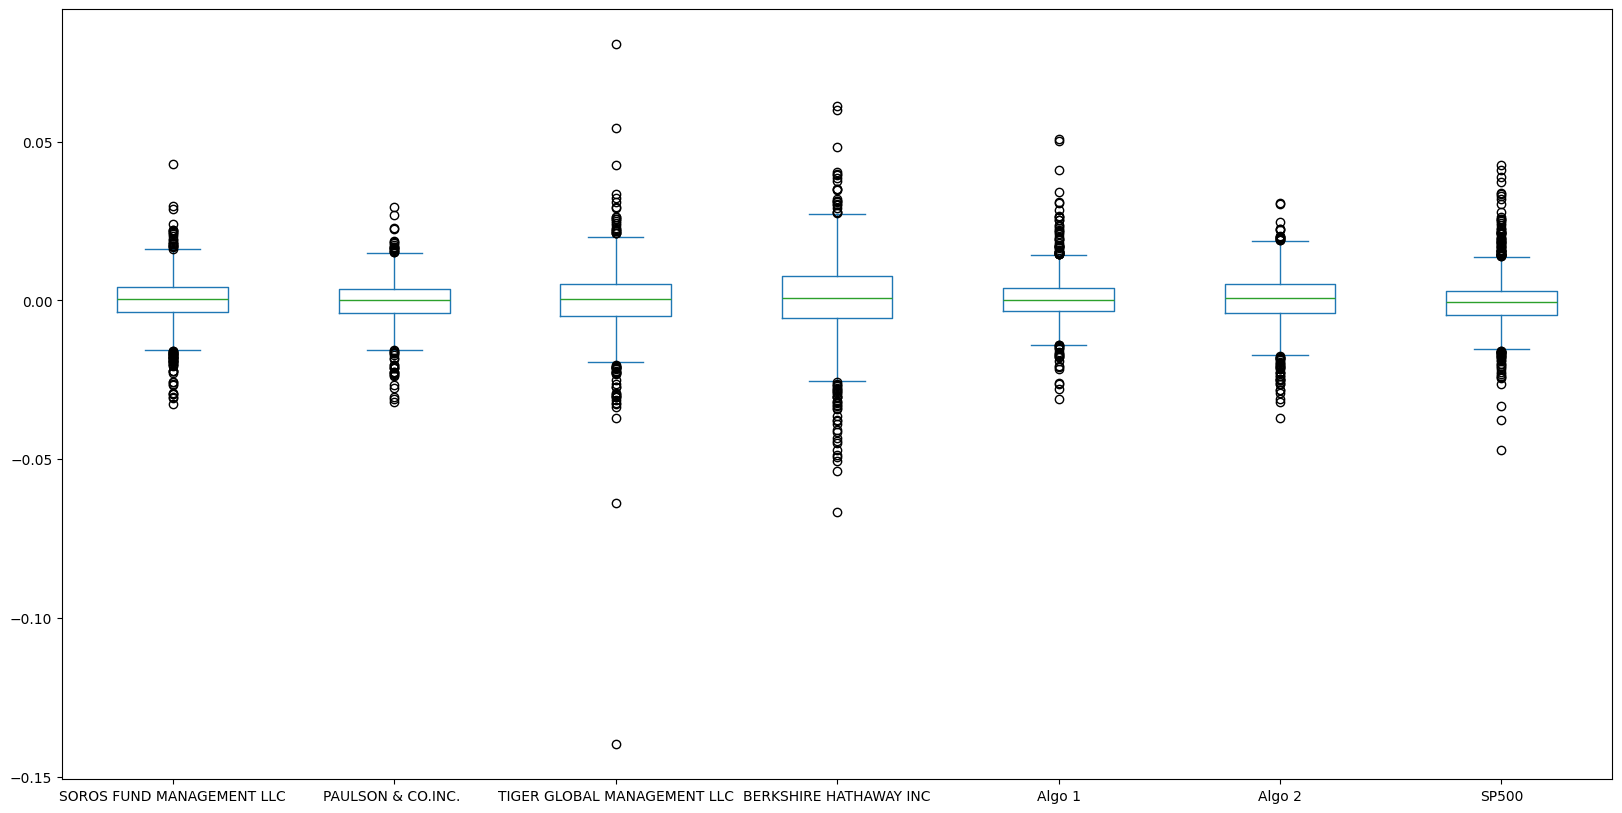

In [84]:
# create a box plot to show the risk of each portfolio
combined_df.plot(kind='box', figsize=(20,10))

In [85]:
# calculate daily standard deviation of each portfolio
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

In [86]:
# calculate daily standard deviation for SP500
combined_df['SP500'].std()

0.00858688974707399

In [87]:
# show which portfolios are riskier than SP500
daily_risk_comparison = combined_df.std()
daily_risk_comparison.sort_values(inplace=True)
daily_risk_comparison.loc['SP500':]

SP500                          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [88]:
# another way to compare risk to SP500
daily_risk_comparison > daily_risk_comparison.loc['SP500']

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
SP500                          False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

<Axes: >

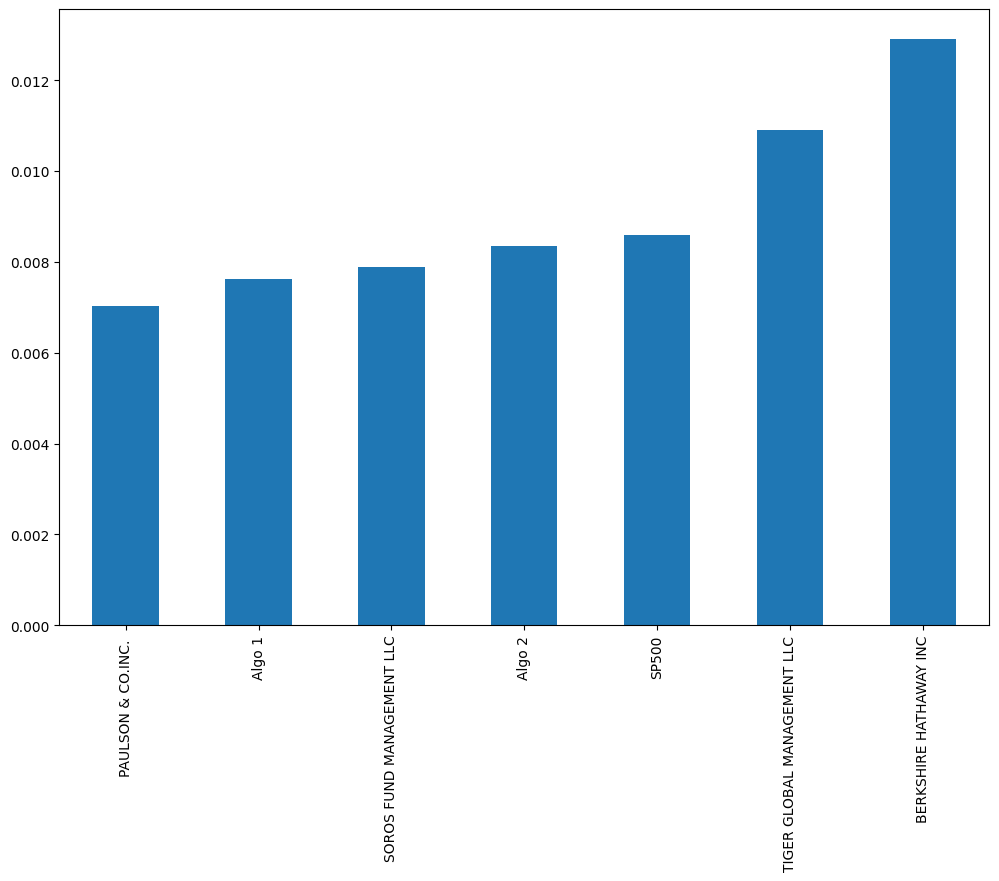

In [89]:
# plot daily risk comparison
daily_risk_comparison.plot(kind='bar', figsize=(12,8))

In [90]:
# calculate annual standard deviation for all portfolios
annual_risk = combined_df.std()*np.sqrt(252)
annual_risk

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics


<Axes: xlabel='Date'>

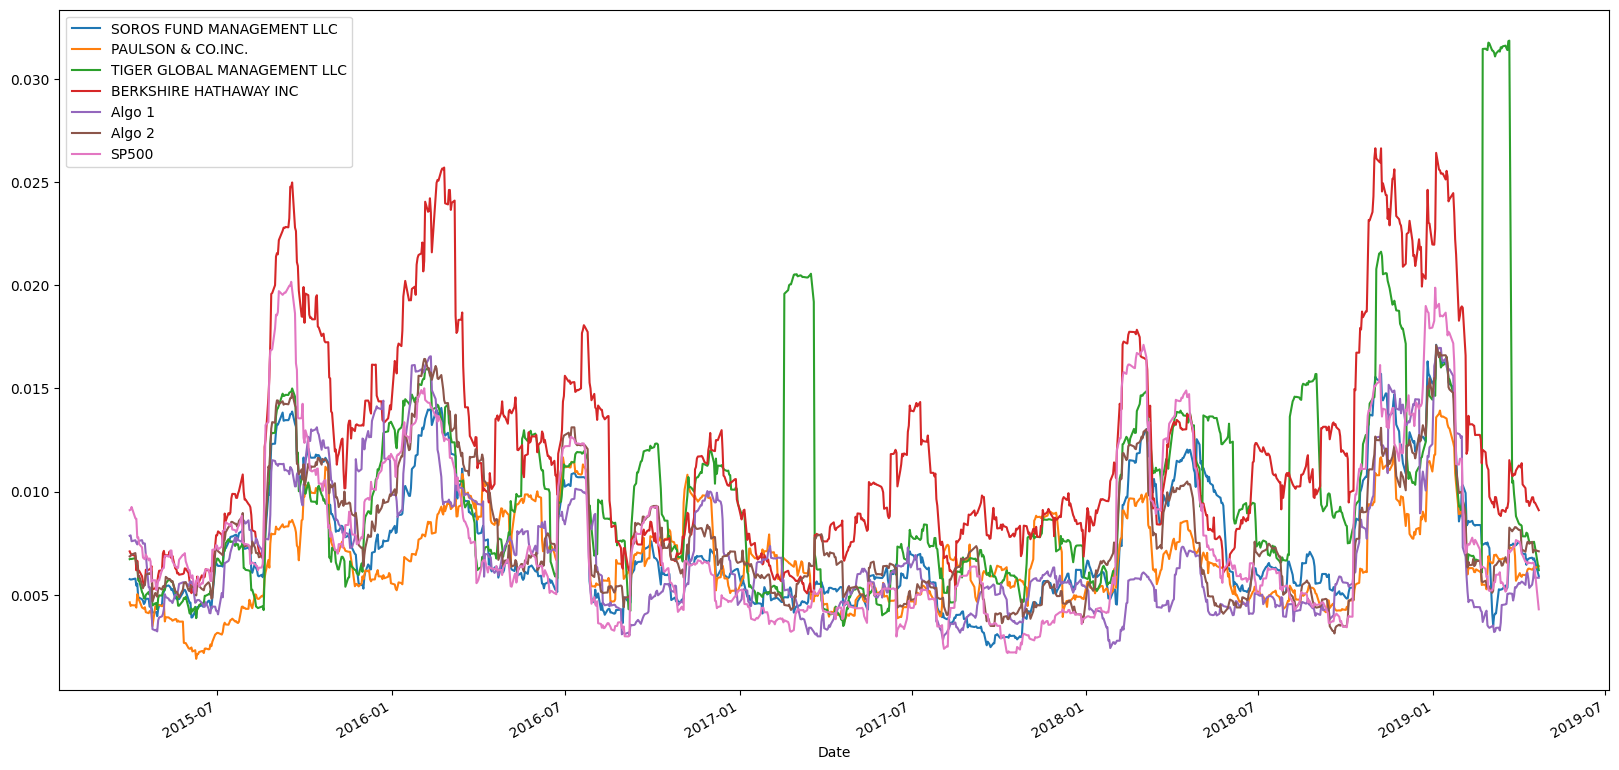

In [91]:
# calculate rolling standard deviation for 21 day window and plot the data
rolling_std = combined_df.rolling(window=21).std()
rolling_std.plot(figsize=(20,10))

In [92]:
# calculate the correlation of all portfolios and show it in a matrix
portfolio_correlation = combined_df.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<Axes: >

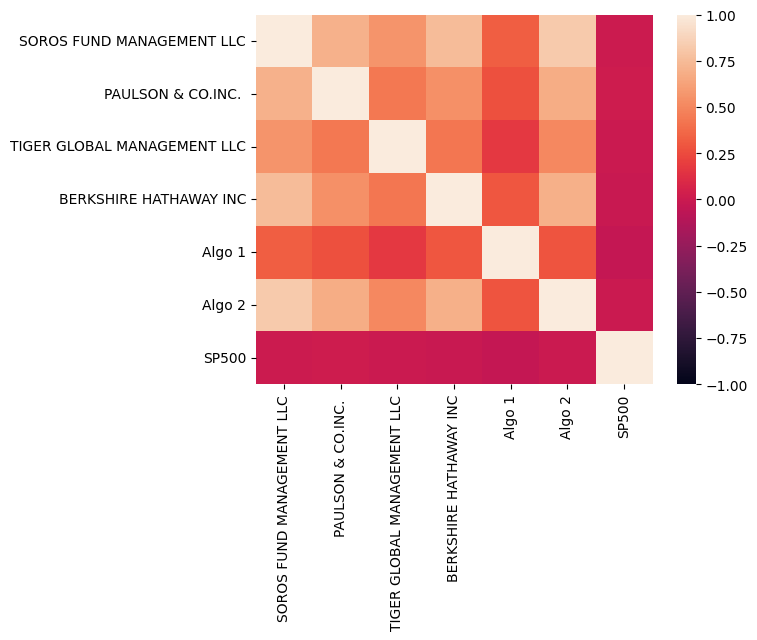

In [93]:
# show correlation in a heatmap for better visualization
sns.heatmap(portfolio_correlation,vmin = -1, vmax = 1)

In [94]:
# calculate covariance of a algo 1 compared to SP500
algo1_covariance = combined_df['Algo 1'].cov(combined_df['SP500'])
algo1_covariance

-2.223042551715512e-06

In [95]:
# calculate the variance of SP500
sp500_variance = combined_df['SP500'].var()
sp500_variance

7.373467552840442e-05

In [96]:
# use the covariance of algo 1 and variance of SP500 to find beta then display algo 1's beta
algo1_beta = algo1_covariance / sp500_variance 
algo1_beta

-0.03014921454233756

<Axes: xlabel='Date'>

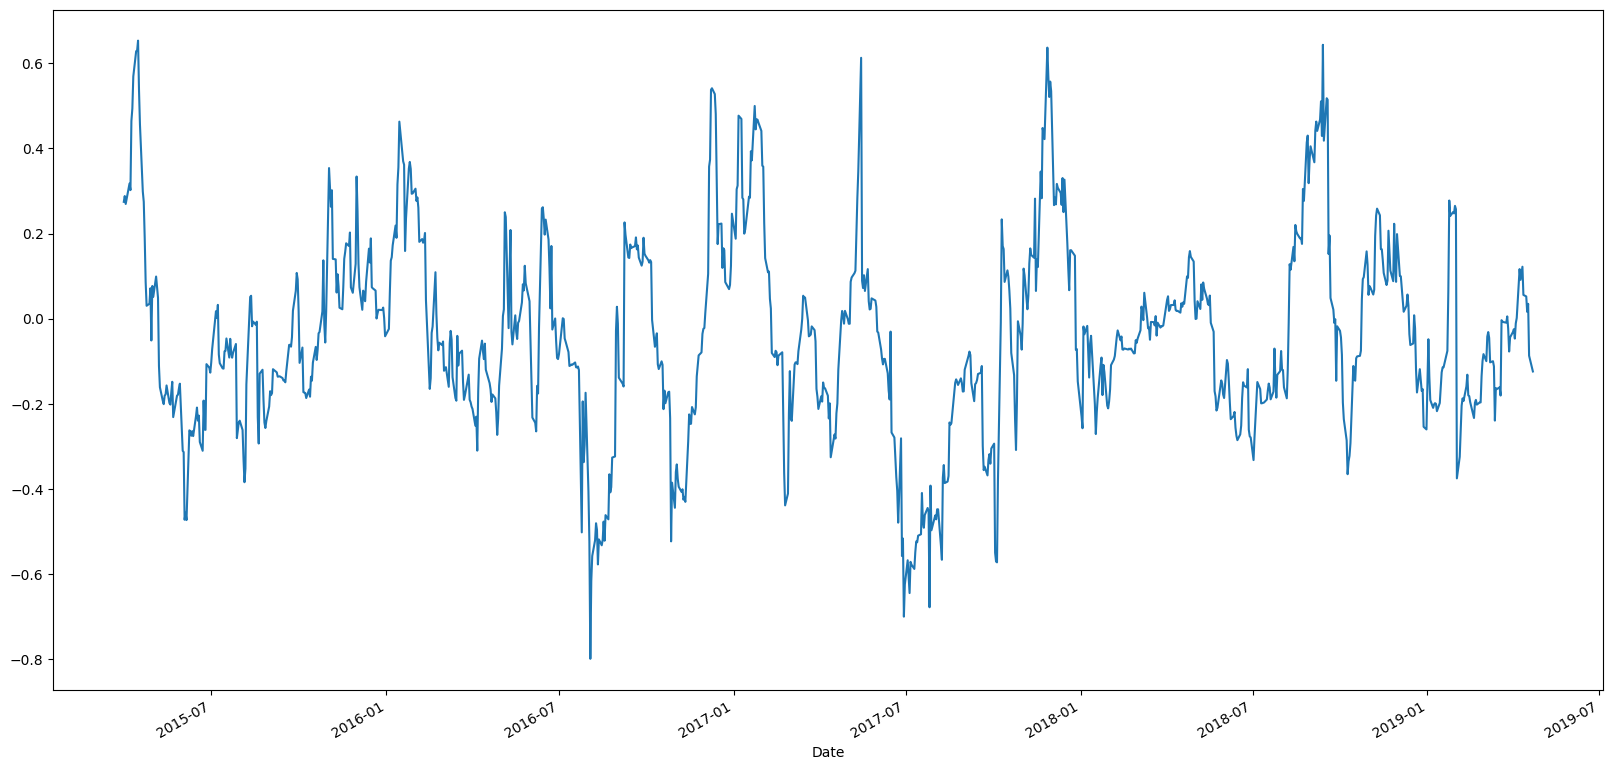

In [97]:
# show algo 1 beta trend on a 21 day window compared to SP500 and plot the data
rolling_algo1_covariance = combined_df['Algo 1'].rolling(window=21).cov(combined_df['SP500'])
rolling_sp500_variance = combined_df['SP500'].rolling(window=21).var()
rolling_algo1_beta = rolling_algo1_covariance / rolling_sp500_variance
rolling_algo1_beta.plot(figsize=(20,10))

In [98]:
# calculate exponentially weighted average of all portfolios
combined_df.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios


In [99]:
# calculate annual sharpe ratio's of all portfolios
annual_sharpe_ratio = (combined_df.mean()*252) / (combined_df.std() * np.sqrt(252))
annual_sharpe_ratio.sort_values(inplace=True)
annual_sharpe_ratio

SP500                         -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

<Axes: >

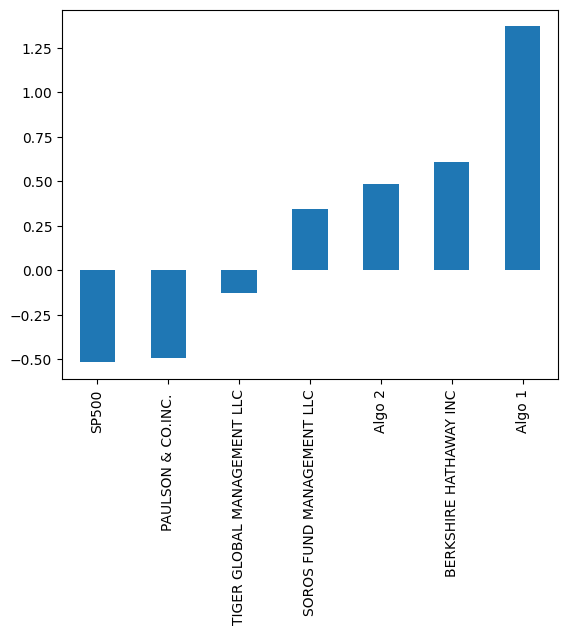

In [100]:
# display sharpe ratios on a bar chart
annual_sharpe_ratio.plot(kind='bar')

### My opinions

Algo 1 shows low volatility compared to the market. It also has negative correlation and negative sensitivity compared to SP500. Not only that, it has a sharpe ratio of 1.36 showing
there's a good possibility of profit when investing in this portfolio. Compared to the whale portfolios, Algo 1 is compareable in volatility, sensitivity, and sharpe ratios with Paulson
and Soros while beating the other whale portfolios. 

Algo 2 also has low volatility, negative correlation, and negative sensetivity compared to the market. Although Algo 2 isn't as good an investment as Algo 1, it is still comparable 
to Paulson and Soros but beats the other portfolios.

Overall, the algorithmic strategies are considered a good investment in my opinion, but Soros and Paulson are very comparable, making them outperform most but not all whale portfolios.

---

# My portfolio

In [101]:
# read in AMD and display dataframe
amdfile = Path('../code_and_stocks/Resources/AMD - Sheet1.csv')
amd_df = pd.read_csv(amdfile, index_col='Date', parse_dates=True, infer_datetime_format=True)
amd_df

,Close
Date,
2017-04-24 16:00:00,13.13
2017-04-25 16:00:00,13.49
2017-04-26 16:00:00,13.41
2017-04-27 16:00:00,13.62
2017-04-28 16:00:00,13.30
...,...
2019-04-12 16:00:00,27.85
2019-04-15 16:00:00,27.33
2019-04-16 16:00:00,27.93


In [102]:
# read in ADBE and display dataframe
adbefile = Path('../code_and_stocks/Resources/ADBE - Sheet1.csv')
adbe_df = pd.read_csv(adbefile, index_col='Date', parse_dates=True, infer_datetime_format=True)
adbe_df

,Close
Date,
2017-04-24 16:00:00,132.89
2017-04-25 16:00:00,133.49
2017-04-26 16:00:00,132.79
2017-04-27 16:00:00,133.38
2017-04-28 16:00:00,133.74
...,...
2019-04-12 16:00:00,271.86
2019-04-15 16:00:00,272.22
2019-04-16 16:00:00,271.43


In [103]:
# read in TSLA and display dataframe
tslafile = Path('../code_and_stocks/Resources/TSLA - Sheet1.csv')
tsla_df = pd.read_csv(tslafile, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_df

,Close
Date,
2017-04-24 16:00:00,20.54
2017-04-25 16:00:00,20.92
2017-04-26 16:00:00,20.68
2017-04-27 16:00:00,20.58
2017-04-28 16:00:00,20.94
...,...
2019-04-12 16:00:00,17.85
2019-04-15 16:00:00,17.76
2019-04-16 16:00:00,18.22


In [104]:
# Combine all stocks in a single DataFrame
my_df = pd.concat([amd_df, adbe_df, tsla_df], axis=1, join='inner')
my_df.columns= ['AMD', 'ADBE', 'TSLA']
my_df.index = my_df.index.normalize()
my_df


,AMD,ADBE,TSLA
Date,,,
2017-04-24,13.13,132.89,20.54
2017-04-25,13.49,133.49,20.92
2017-04-26,13.41,132.79,20.68
2017-04-27,13.62,133.38,20.58
2017-04-28,13.30,133.74,20.94
...,...,...,...
2019-04-12,27.85,271.86,17.85
2019-04-15,27.33,272.22,17.76
2019-04-16,27.93,271.43,18.22


<Axes: xlabel='Date'>

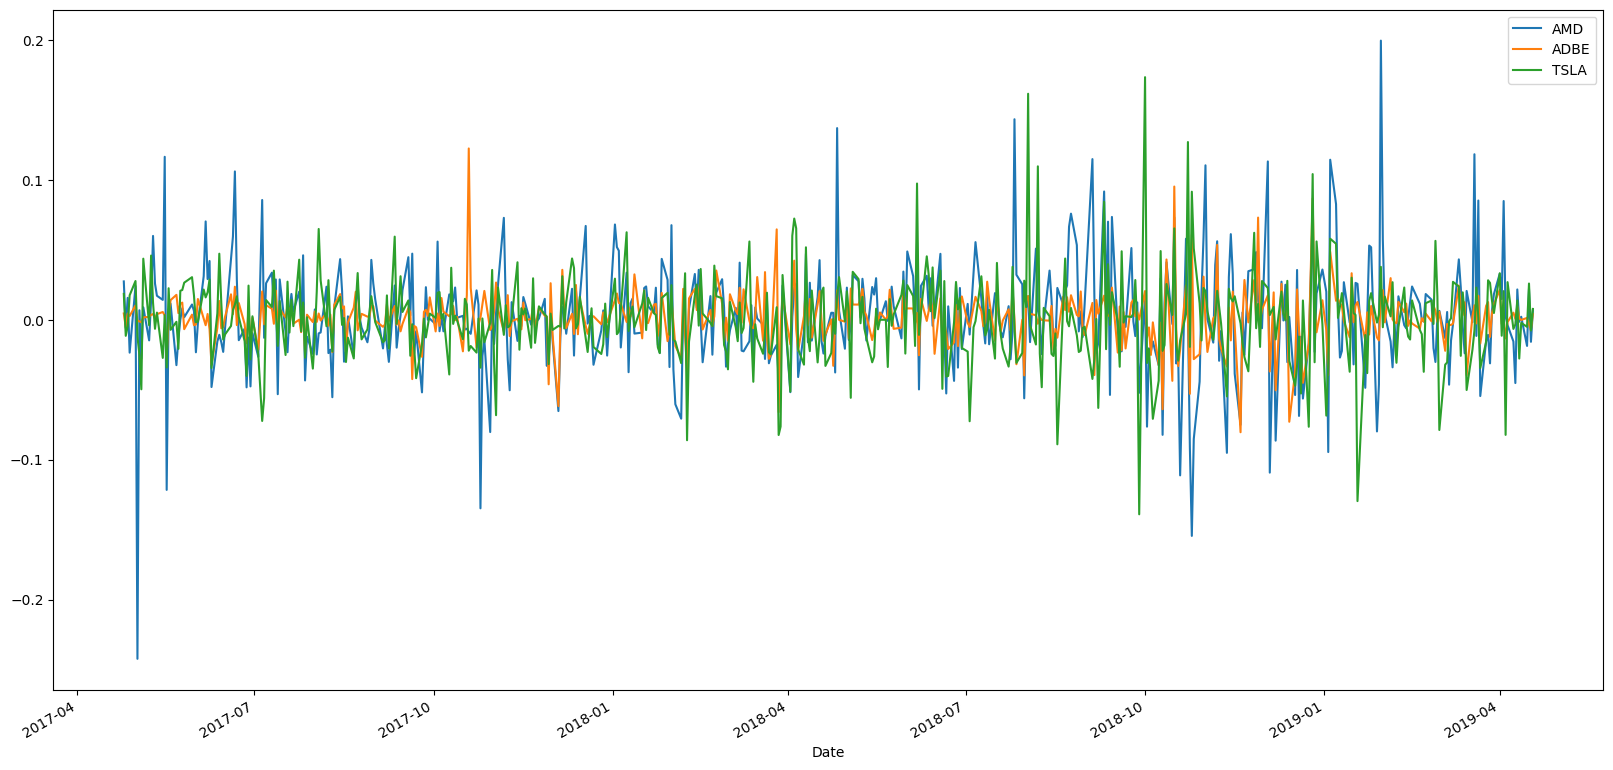

In [105]:
# calculate daily returns of all stocks then plot the data
my_daily_returns = my_df.pct_change()
my_daily_returns.plot(figsize=(20,10))

In [106]:
# preview the daily returns of my stocks
my_daily_returns

,AMD,ADBE,TSLA
Date,,,
2017-04-24,NaN,NaN,NaN
2017-04-25,0.027418,0.004515,0.018500
2017-04-26,-0.005930,-0.005244,-0.011472
2017-04-27,0.015660,0.004443,-0.004836
2017-04-28,-0.023495,0.002699,0.017493
...,...,...,...
2019-04-12,0.002159,-0.000147,-0.002236
2019-04-15,-0.018671,0.001324,-0.005042
2019-04-16,0.021954,-0.002902,0.025901


<Axes: xlabel='Date'>

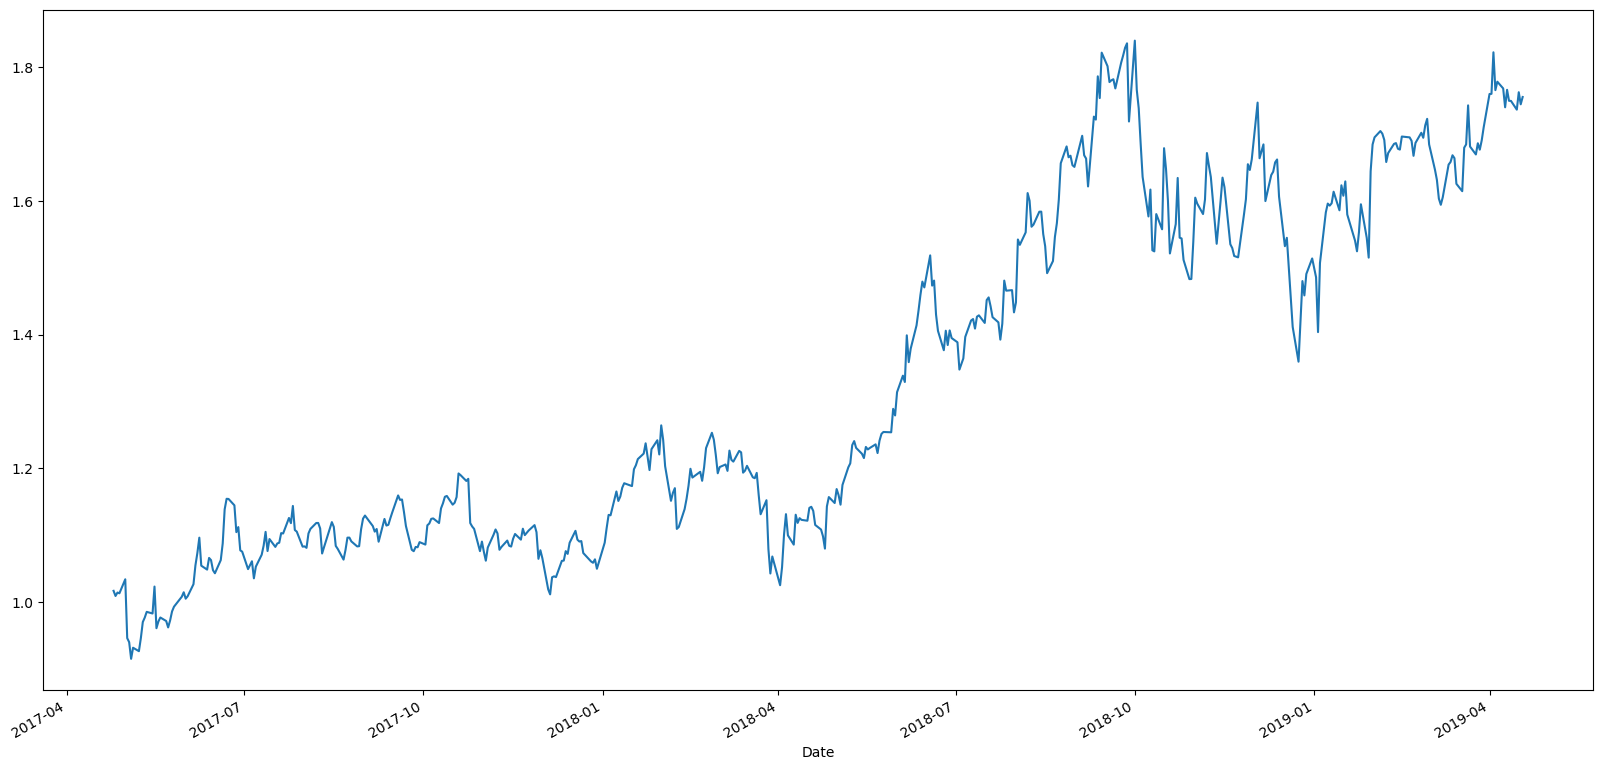

In [107]:
# calculate cumulative returns of my portfolio and plot the data 
weights = [(1 / my_daily_returns.shape[1])] * my_daily_returns.shape[1]
my_portfolio_returns = my_daily_returns.dot(weights)
my_portfolio_cumulative_returns = (1 + my_portfolio_returns).cumprod()
my_portfolio_cumulative_returns.plot(figsize=(20,10))

In [108]:
# combine my portfolio with the other portfolios to run comparisons
comparing_portfolios = pd.concat([combined_df, my_portfolio_returns], axis=1, join='inner')
comparing_portfolios.rename(columns={0: 'Mine'}, inplace=True)
comparing_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Mine
Date,,,,,,,,
2017-04-24,0.008211,0.007577,0.011652,0.013635,-0.008930,0.009306,-0.006058,NaN
2017-04-25,0.005335,-0.000904,-0.000303,0.007220,0.008136,0.006739,0.000490,0.016811
2017-04-26,0.003868,0.006180,-0.010733,0.010105,-0.005080,0.004459,-0.000553,-0.007549
2017-04-27,0.002225,0.004637,-0.001710,0.000822,-0.005333,-0.001183,0.001917,0.005089
2017-04-28,-0.000972,-0.000331,-0.005298,-0.005322,0.004049,-0.006033,-0.001729,-0.001101
...,...,...,...,...,...,...,...,...
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630,-0.000075
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.007463
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.014984


In [109]:
# drop all null values 
comparing_portfolios.dropna(inplace=True)
comparing_portfolios.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
Mine                           0
dtype: int64

In [110]:
# calculate annual standard deviation of all portfolios to compare risk
compared_annual_std = comparing_portfolios.std()*np.sqrt(252)
compared_annual_std

SOROS FUND MANAGEMENT LLC      0.130469
PAULSON & CO.INC.              0.110184
TIGER GLOBAL MANAGEMENT LLC    0.190181
BERKSHIRE HATHAWAY INC         0.208545
Algo 1                         0.110195
Algo 2                         0.123624
SP500                          0.136794
Mine                           0.356224
dtype: float64

<Axes: xlabel='Date'>

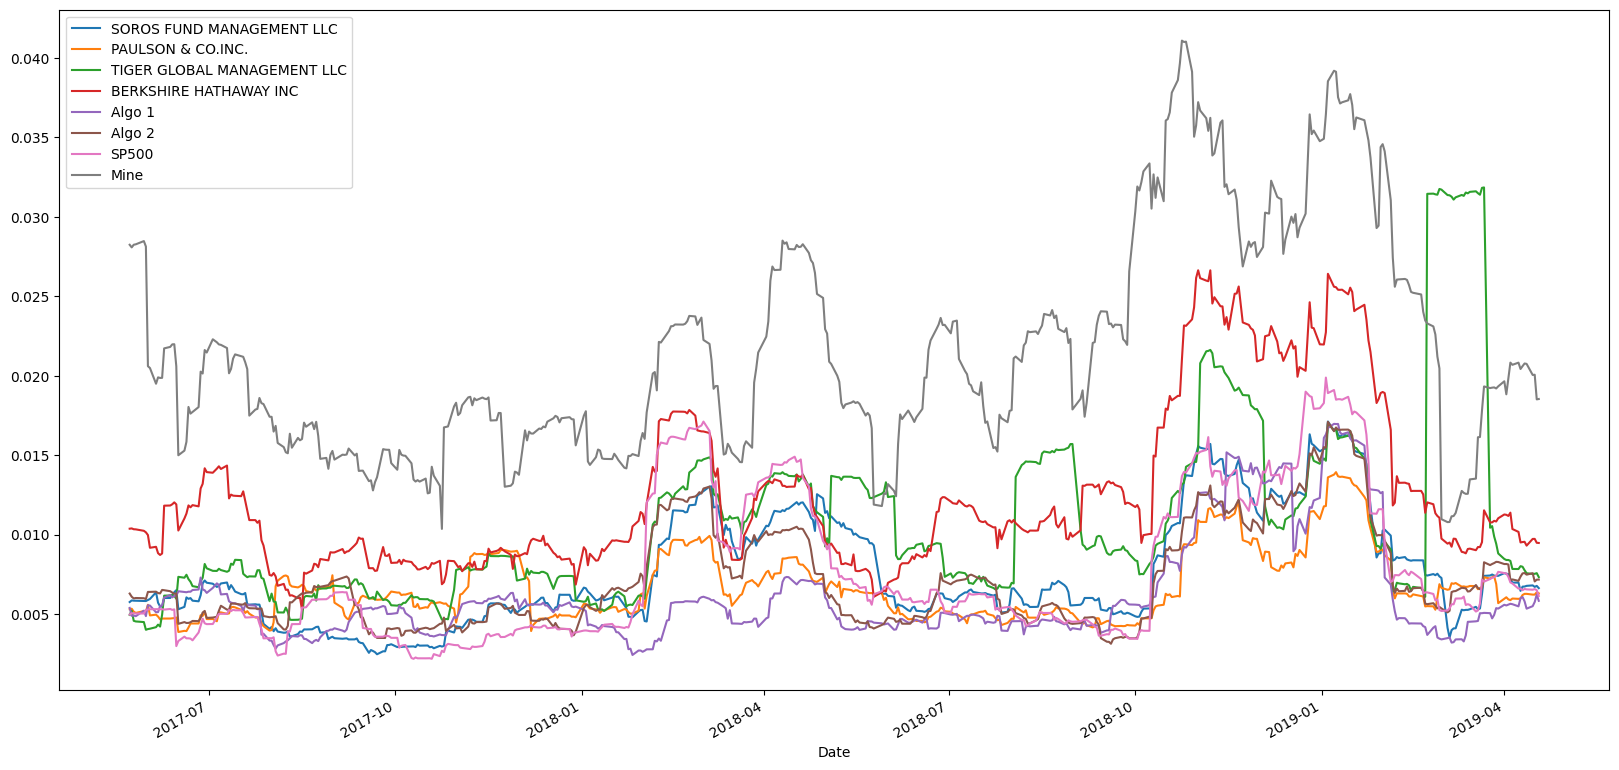

In [111]:
# calculate rolling standard deviation in a 21 day window and plot the data
compared_rolling_std = comparing_portfolios.rolling(window=21).std()
compared_rolling_std.plot(figsize=(20,10))

In [112]:
# calculate correlation and show it in a matrix
compared_correlation = comparing_portfolios.corr()
compared_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Mine
SOROS FUND MANAGEMENT LLC,1.000000,0.712643,0.506352,0.766192,0.282345,0.802386,0.014121,0.555231
PAULSON & CO.INC.,0.712643,1.000000,0.460145,0.585493,0.293664,0.735712,-0.010964,0.448461
TIGER GLOBAL MANAGEMENT LLC,0.506352,0.460145,1.000000,0.370826,0.110867,0.462100,-0.016283,0.304680
BERKSHIRE HATHAWAY INC,0.766192,0.585493,0.370826,1.000000,0.252436,0.746563,-0.017652,0.659445
Algo 1,0.282345,0.293664,0.110867,0.252436,1.000000,0.288677,-0.055901,0.167924
Algo 2,0.802386,0.735712,0.462100,0.746563,0.288677,1.000000,-0.014910,0.578742
SP500,0.014121,-0.010964,-0.016283,-0.017652,-0.055901,-0.014910,1.000000,0.043267
Mine,0.555231,0.448461,0.304680,0.659445,0.167924,0.578742,0.043267,1.000000


<Axes: >

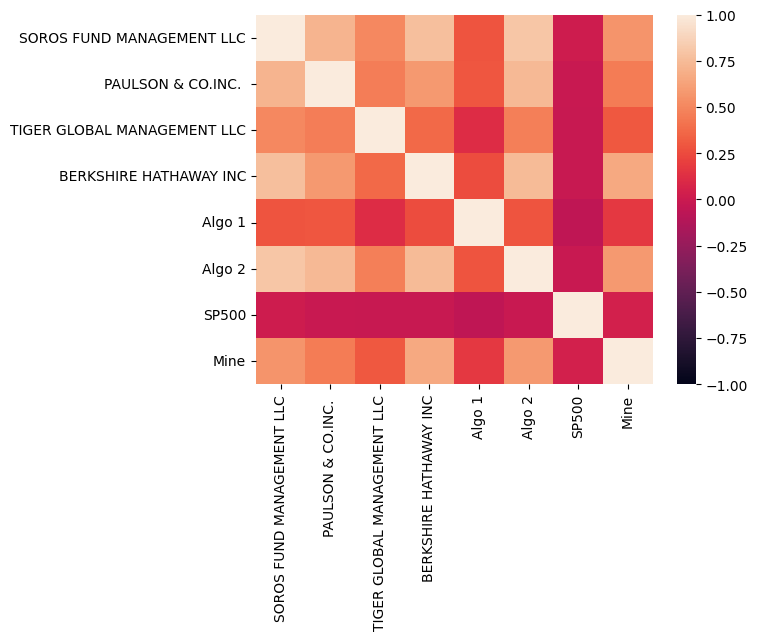

In [113]:
# plot correlation in a heatmap for better visualization
sns.heatmap(compared_correlation, vmin=-1, vmax=1)

<Axes: xlabel='Date'>

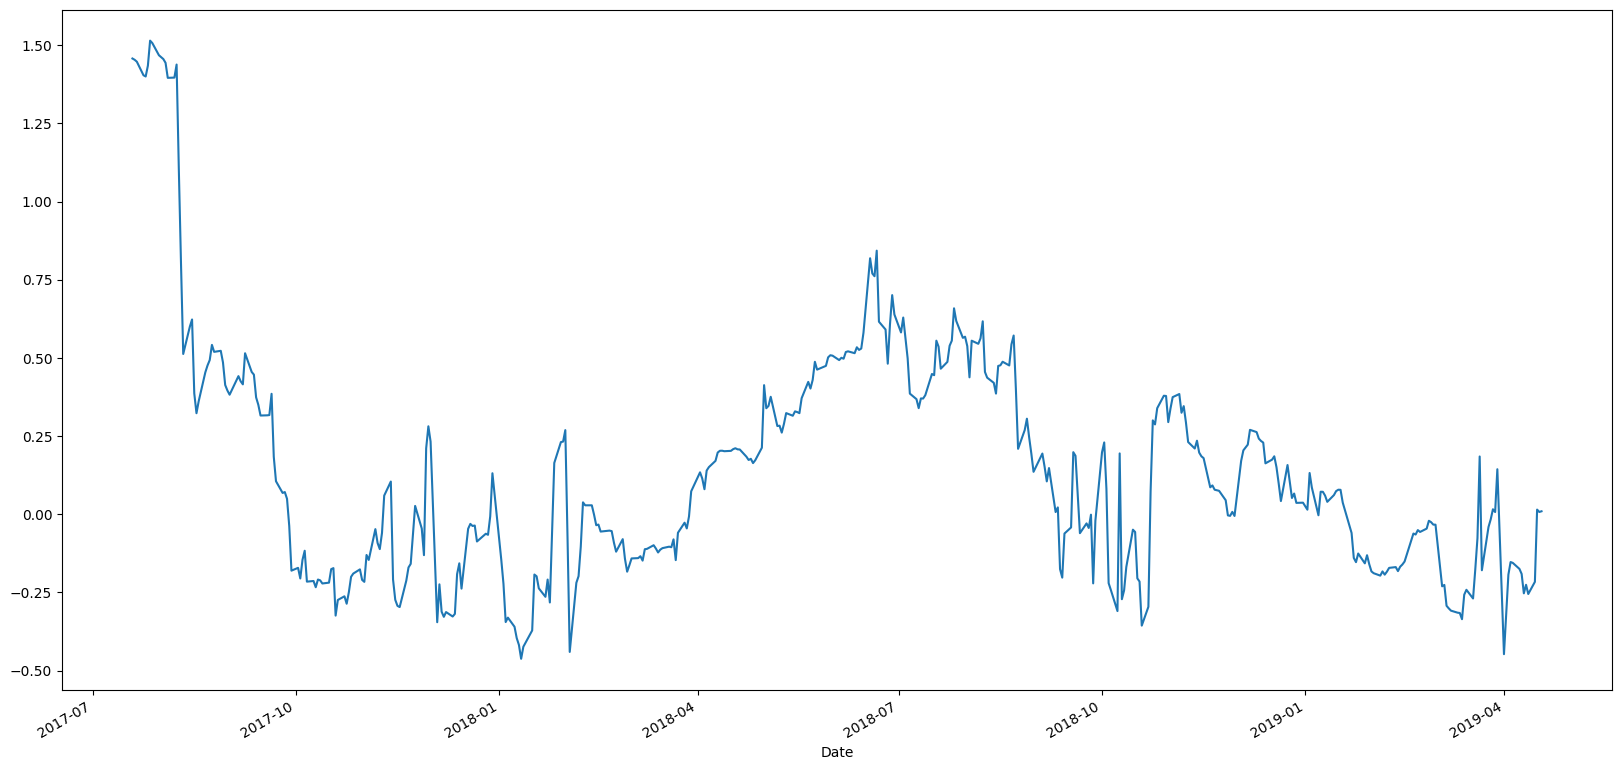

In [114]:
# calculate rolling beta of my stock compared to SP500 in a 60 day window
my_rolling_covariance = comparing_portfolios['Mine'].rolling(window=60).cov(comparing_portfolios['SP500'])
sp_rolling_variance = comparing_portfolios['SP500'].rolling(window=60).var()
compared_rolling_beta = my_rolling_covariance / sp_rolling_variance
compared_rolling_beta.plot(figsize=(20,10))

In [115]:
# calculate annual sharpe ratios of all portfolios
compared_annual_sharpe = (comparing_portfolios.mean()*252) / (comparing_portfolios.std() * np.sqrt(252))
compared_annual_sharpe

SOROS FUND MANAGEMENT LLC      0.385291
PAULSON & CO.INC.             -0.374790
TIGER GLOBAL MANAGEMENT LLC   -1.180818
BERKSHIRE HATHAWAY INC         0.925800
Algo 1                         1.406943
Algo 2                         0.629835
SP500                         -0.656689
Mine                           0.973915
dtype: float64

<Axes: >

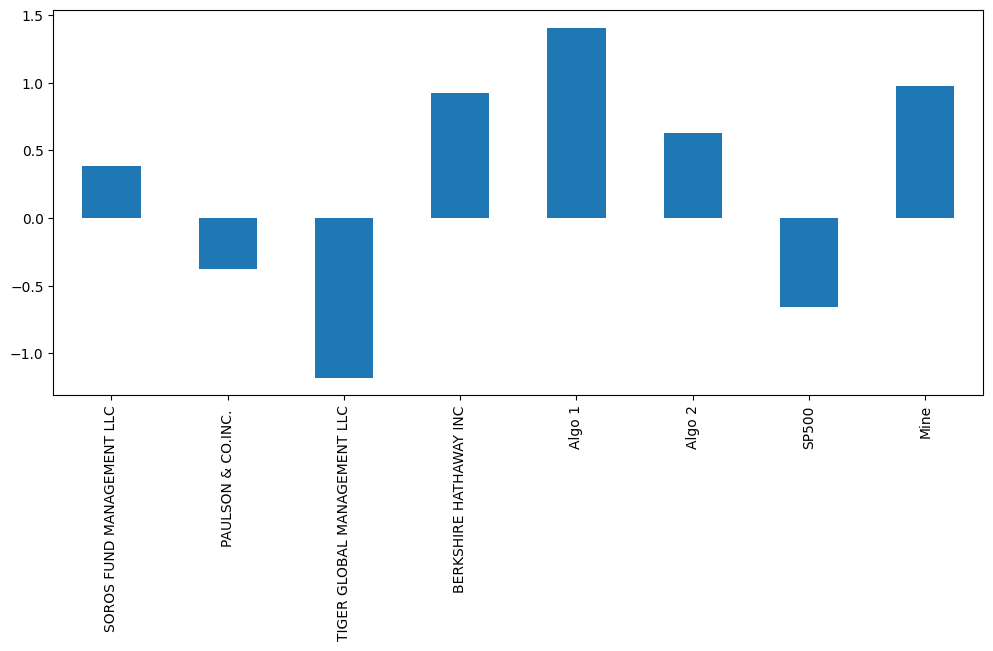

In [116]:
# plot the annual sharpe ratios
compared_annual_sharpe.plot(kind='bar', figsize=(12,5))

<Axes: xlabel='Date'>

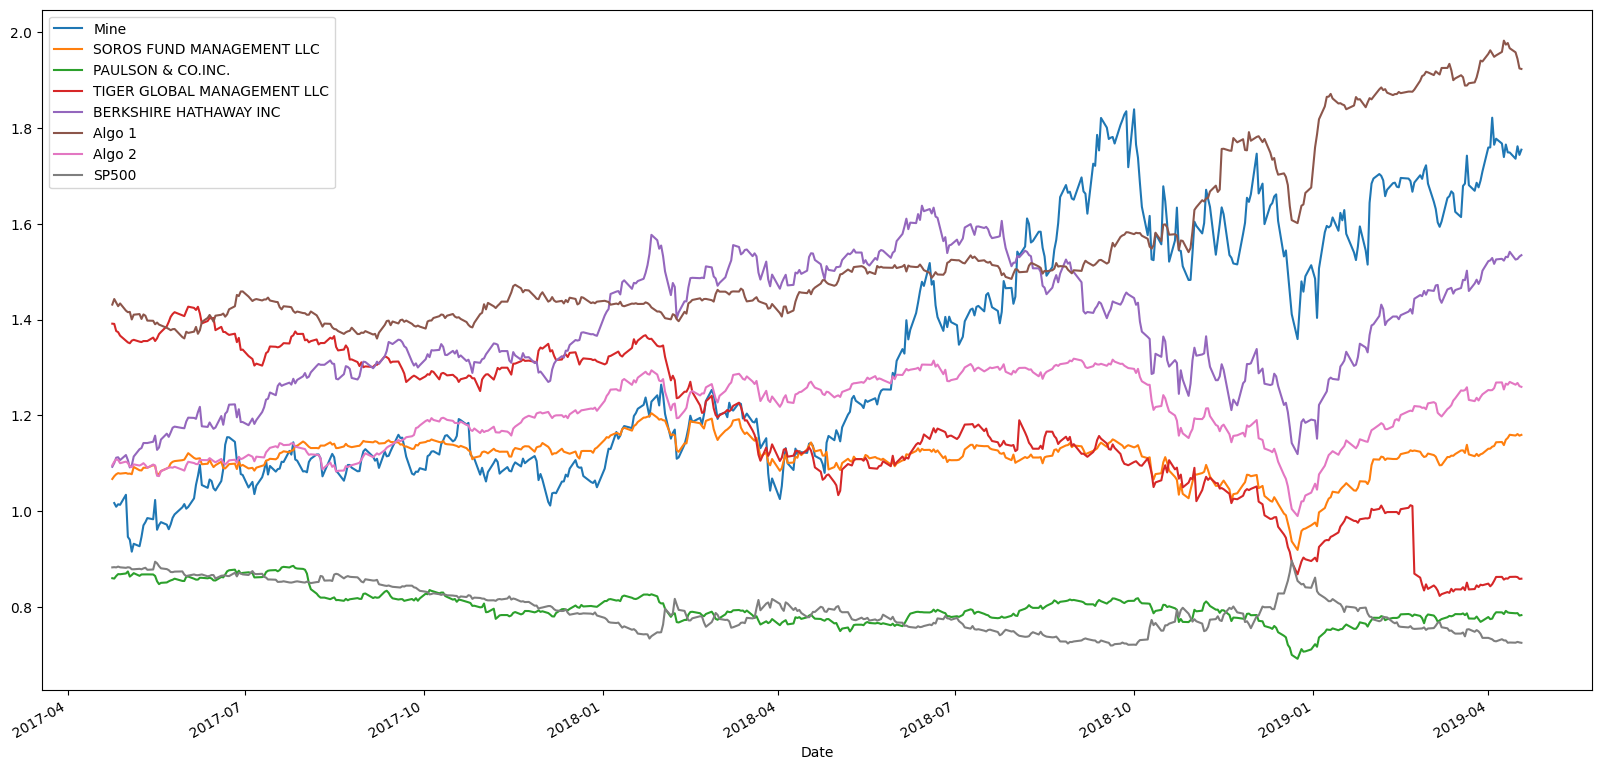

In [117]:
# combine all cumulative returns of portfolios and plot the data
compared_cumulative_returns = pd.concat([my_portfolio_cumulative_returns, cumulative_combined_returns], axis=1, join='inner')
compared_cumulative_returns.rename(columns={0: 'Mine'}, inplace=True)
compared_cumulative_returns.dropna()
compared_cumulative_returns.plot(figsize=(20,10))

### My opinion on my portfolio

My portfolio shows considerable risk compared to the other porfolios, it also shows more correlation to SP500 than all the other portfolios. However, my portfolio outperformed every
portfolio except Algo 1, so I would recommend my portfolio to anyone with a high risk tolerance.
